In [151]:
import pandas as pd
data=pd.read_csv(r"oliveoil.csv")
print(data.describe())

          palmitic  palmitoleic     stearic        oleic     linoleic  \
count   572.000000   572.000000  572.000000   572.000000   572.000000   
mean   1231.741259   126.094406  228.865385  7311.748252   980.527972   
std     168.592264    52.494365   36.744935   405.810222   242.799221   
min     610.000000    15.000000  152.000000  6300.000000   448.000000   
25%    1095.000000    87.750000  205.000000  7000.000000   770.750000   
50%    1201.000000   110.000000  223.000000  7302.500000  1030.000000   
75%    1360.000000   169.250000  249.000000  7680.000000  1180.750000   
max    1753.000000   280.000000  375.000000  8410.000000  1470.000000   

        linolenic   arachidic  eicosenoic  
count  572.000000  572.000000  572.000000  
mean    31.888112   58.097902   16.281469  
std     12.968697   22.030250   14.083295  
min      0.000000    0.000000    1.000000  
25%     26.000000   50.000000    2.000000  
50%     33.000000   61.000000   17.000000  
75%     40.250000   70.000000   28

In [152]:

data= data.iloc[:, 2:]
data.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


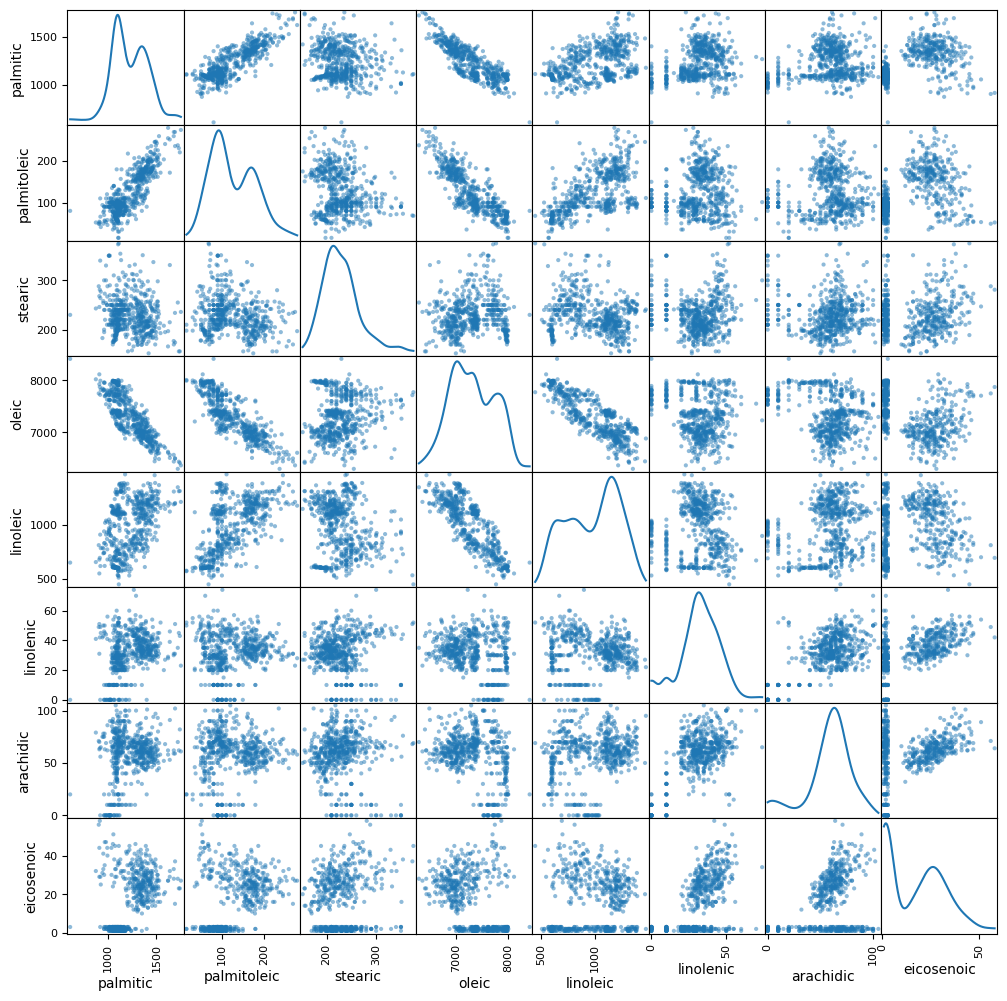

In [153]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data, figsize=(12,12), diagonal="kde")
plt.show()

In [154]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(data)
idk = np.argsort(kmeans.labels_)
# print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))
# print(kmeans.transform(data))
# print(kmeans.cluster_centers_)


C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
from sklearn import metrics
#silhouette 
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(data)
    res[k] = metrics.silhouette_score(data,km.labels_)
# print (res)



C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\App

<function matplotlib.pyplot.show(close=None, block=None)>

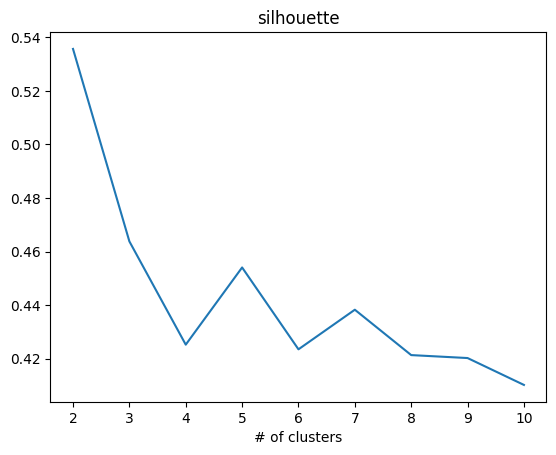

In [156]:
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

In [157]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data,method='ward', metric='euclidean')


groupes_cah = fcluster(Z, t=3, criterion='maxclust')

# sort groups indexes
idg = np.argsort(groupes_cah)



In [158]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2
row_0,,,
1,0,12,175
2,5,148,1
3,207,24,0


In [159]:
import pandas as pd

# Create a DataFrame with hierarchical clustering (CAH) and k-means clustering results
cluster_results = pd.DataFrame({'cah': groupes_cah, 'kmeans': kmeans.labels_})

print(cluster_results.head())
print(cluster_results['cah'].unique())


   cah  kmeans
0    1       2
1    1       2
2    1       2
3    1       2
4    1       2
[1 2 3]


In [160]:
data_with_kmeans = data.join(cluster_results['kmeans'])
data_with_kmeans= data_with_kmeans.rename(columns={"kmeans":"class"})
print(data_with_kmeans.head())

   palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  arachidic  \
0      1075           75      226   7823       672         36         60   
1      1088           73      224   7709       781         31         61   
2       911           54      246   8113       549         31         63   
3       966           57      240   7952       619         50         78   
4      1051           67      259   7771       672         50         80   

   eicosenoic  class  
0          29      2  
1          29      2  
2          29      2  
3          35      2  
4          46      2  


In [161]:
# Identify rows with different cluster assignments
diff_rows = cluster_results[(3-cluster_results['cah'])%3 != cluster_results['kmeans']]

# Get the index of the rows with different cluster assignments
diff_rows_index = diff_rows.index
filtered_data = data_with_kmeans.drop(diff_rows_index)


print(filtered_data.shape)

(530, 9)


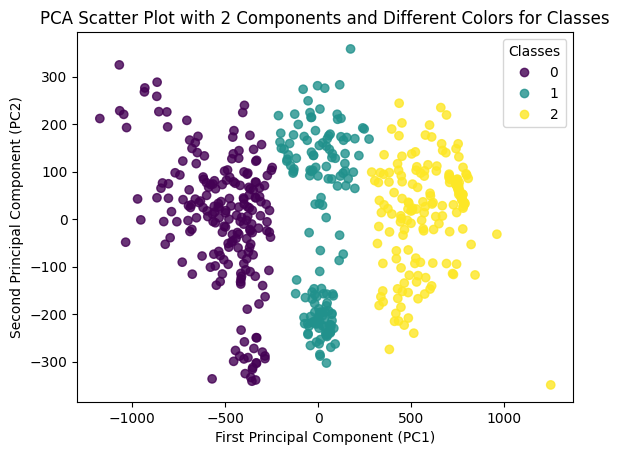

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data_with_class' is your DataFrame containing the filtered data with the 'class' column

# Separate the features and the class column
features = filtered_data.drop('class', axis=1)
classes = filtered_data['class']

# Remove any non-numeric columns from the features dataset (if any)
numeric_features = features.select_dtypes(include=np.number)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_features)

# Create a DataFrame with the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Create a scatter plot of the PCA result with different colors for different classes
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=classes, cmap='viridis', alpha=0.8)

# Add a legend for the classes
plt.legend(*scatter.legend_elements(), title="Classes")

plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Scatter Plot with 2 Components and Different Colors for Classes')
plt.show()


In [163]:
filtered_data.to_csv('oliveoildata.csv', index=False)


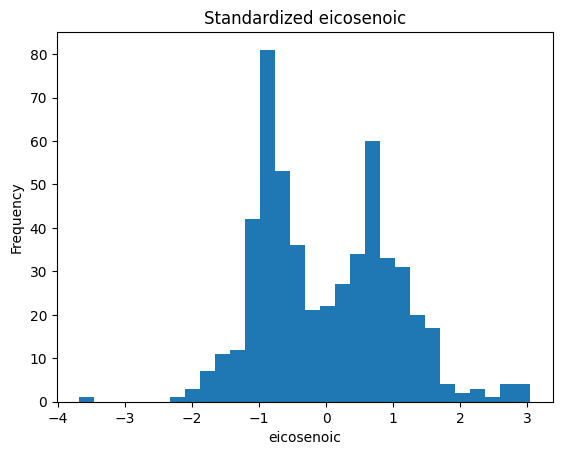

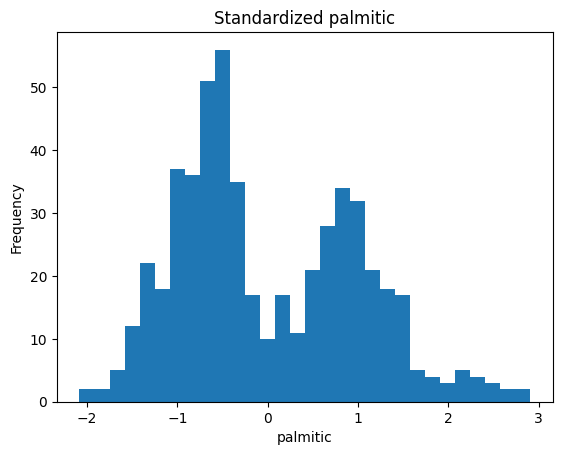

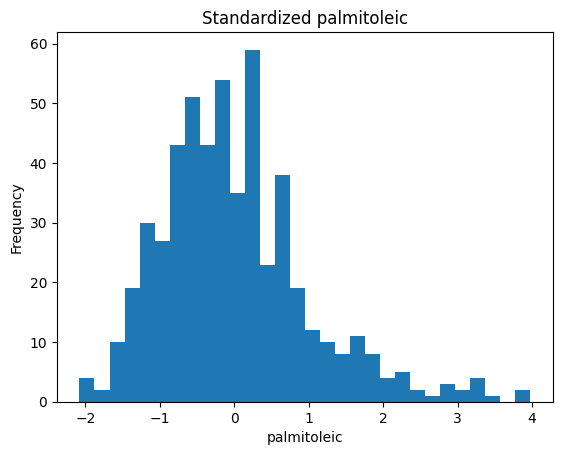

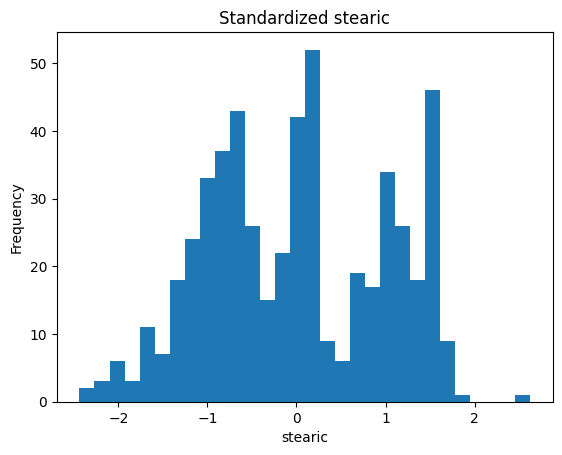

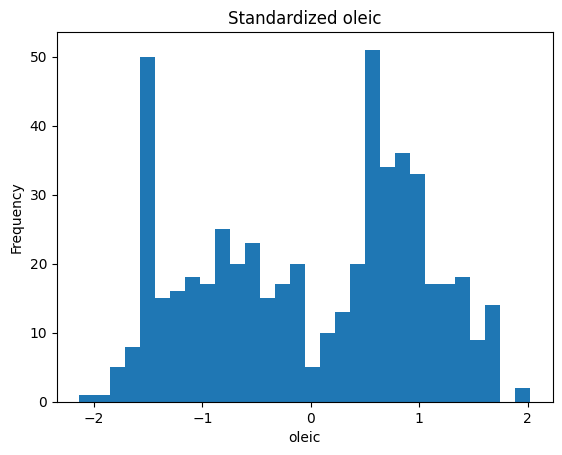

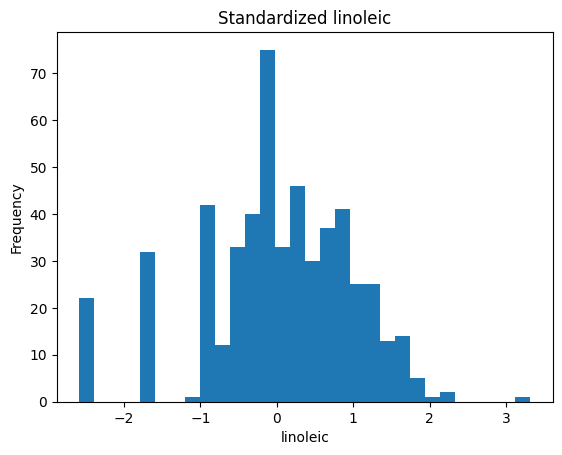

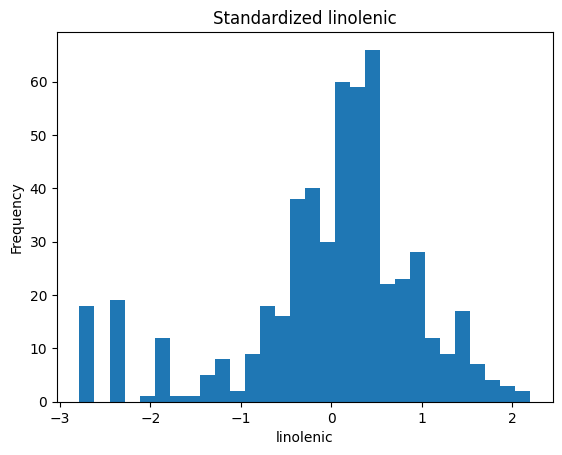

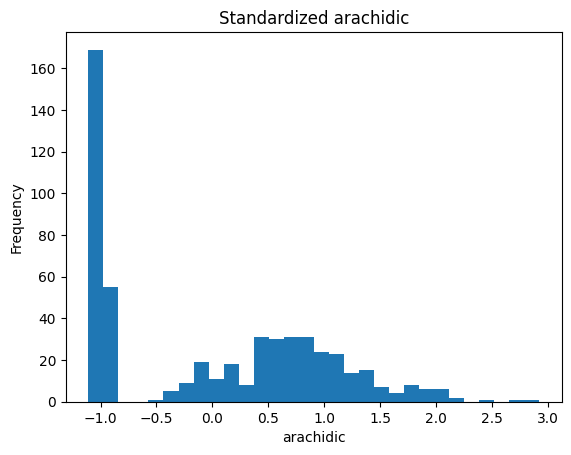

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame called "data"
# and you have a list of feature column names called "feature_columns"

# Select the features from the dataset
features = filtered_data.drop('class',axis=1)
# classes = filtered_data['class']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the standardized features
scaled_data = pd.DataFrame(scaled_features, columns=['eicosenoic',  'palmitic',  'palmitoleic' ,  'stearic' , 'oleic' , 'linoleic'  ,'linolenic',  'arachidic'])

# Assuming your standardized data is stored in a DataFrame called "scaled_data"
for column in scaled_data.columns:
    plt.figure()
    plt.hist(scaled_data[column], bins=30)
    plt.title(f'Standardized {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [165]:
final_data = scaled_data.join(filtered_data['class'])

In [166]:
final_data = final_data.loc[final_data['class'].notnull()]
final_data.to_csv('final_data.csv', index=False)